<a href="https://colab.research.google.com/github/pguisordi/study/blob/master/An%C3%A1lise_Explorat%C3%B3ria_Tips.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importando as bibliotecas a serem utilizadas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.colors import to_rgba

<div align="center"><h1> Análise do Dataset Tips </h1></div>

O dataset tips é um conjunto de dados building na biblioteca Seaborn

**Objetivo da Análise:** Compreender como os consomidores do restaurante se comportam 

**Metodologia:** Análise Exploratória de Dados

**Amostra:** 244 observações

In [ ]:
#abrindo o dados que analisaremos
df_tips = sns.load_dataset('tips')
columns= ['total_conta', 'gorjeta', 'genero','fumante', 'dia_semana', 'horario', 'pax_mesa']
df_tips.columns= columns
df_tips.head()

,total_conta,gorjeta,genero,fumante,dia_semana,horario,pax_mesa
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
df_tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   total_conta  244 non-null    float64 
 1   gorjeta      244 non-null    float64 
 2   genero       244 non-null    category
 3   fumante      244 non-null    category
 4   dia_semana   244 non-null    category
 5   horario      244 non-null    category
 6   pax_mesa     244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [ ]:
df_tips.describe()

,total_conta,gorjeta,pax_mesa
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


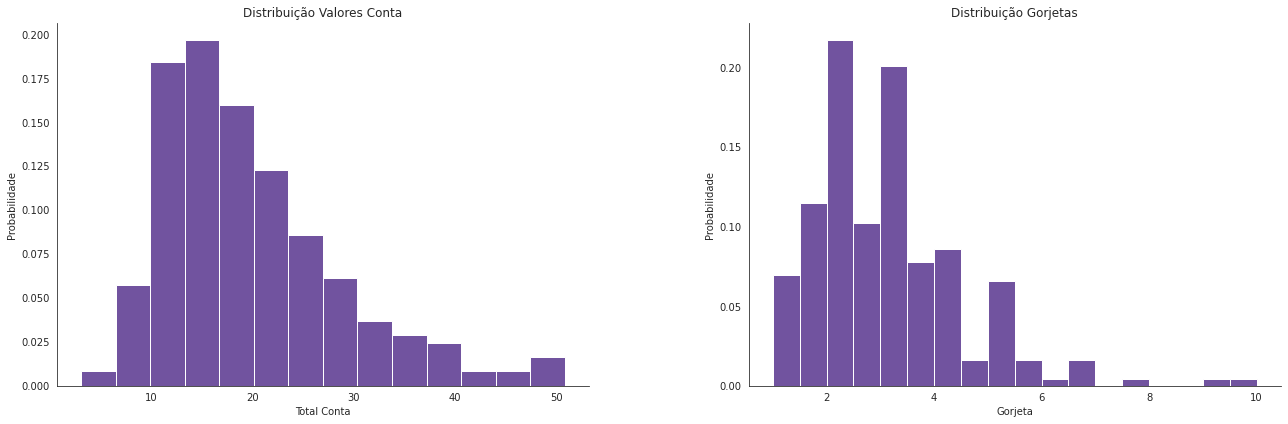

In [ ]:
#entendendo dados contínuos
sns.set_style("white") 
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(20, 6))
sns.histplot(data=df_tips, x='total_conta', ax=axs[0], color = '#42197f', stat='probability')
axs[0].set_title('Distribuição Valores Conta')
axs[0].set_xlabel('Total Conta')
axs[0].set_ylabel('Probabilidade')
axs[1].set_title('Distribuição Gorjetas')
axs[1].set_xlabel('Gorjeta')
axs[1].set_ylabel('Probabilidade')
sns.histplot(data=df_tips, x='gorjeta', ax=axs[1],color = '#42197f', stat='probability')
sns.despine(right=True, top=True )
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.3);

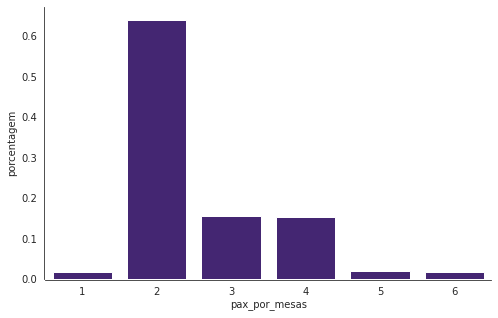

In [ ]:
#entendendo dados discretos
table_size = df_tips['pax_mesa'].value_counts(normalize=True).reset_index().rename(columns={'index':'pax_por_mesas',
                                                                          'pax_mesa':'porcentagem'}).sort_values(by=['porcentagem'])
plt.figure(figsize=(8,5))
sns.barplot(data=table_size, x='pax_por_mesas', y= 'porcentagem',  color = '#42197f')
sns.despine(offset=True);

In [ ]:
#dados qualitativos
df_tips.describe(include='category')

,genero,fumante,dia_semana,horario
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


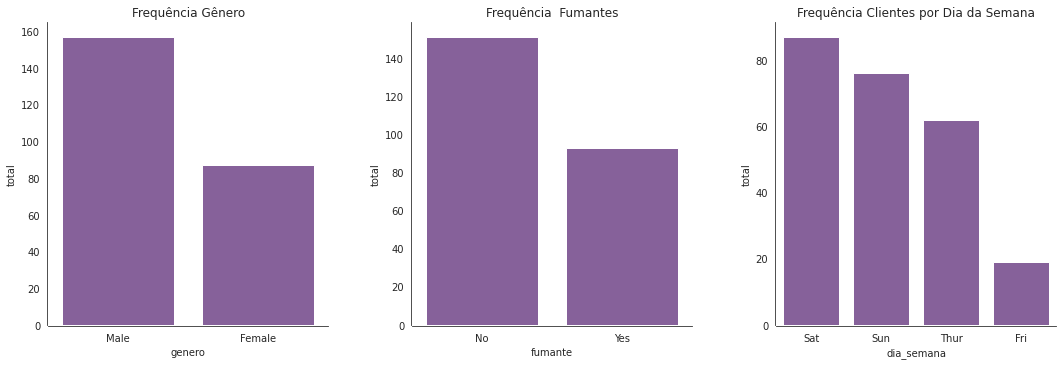

In [ ]:
#conhecendo nossos clientes part1
fig,axs = plt.subplots(1,3, figsize=(10,5))
sns.countplot(data=df_tips, x='genero', ax=axs[0], color = "#8958a3")
axs[0].set_title('Frequência Gênero')
axs[0].set_ylabel('total')
sns.countplot(data=df_tips, x='fumante', ax=axs[1], color = "#8958a3", order=['No','Yes'])
axs[1].set_title('Frequência  Fumantes')
axs[1].set_ylabel('total')
sns.countplot(data=df_tips, x='dia_semana', ax=axs[2], color = "#8958a3", 
              order=['Sat','Sun','Thur', 'Fri'])
axs[2].set_title('Frequência Clientes por Dia da Semana')
axs[2].set_ylabel('total')
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=1.5, hspace=0.35,
                    wspace=0.3)
sns.despine(offset=True);

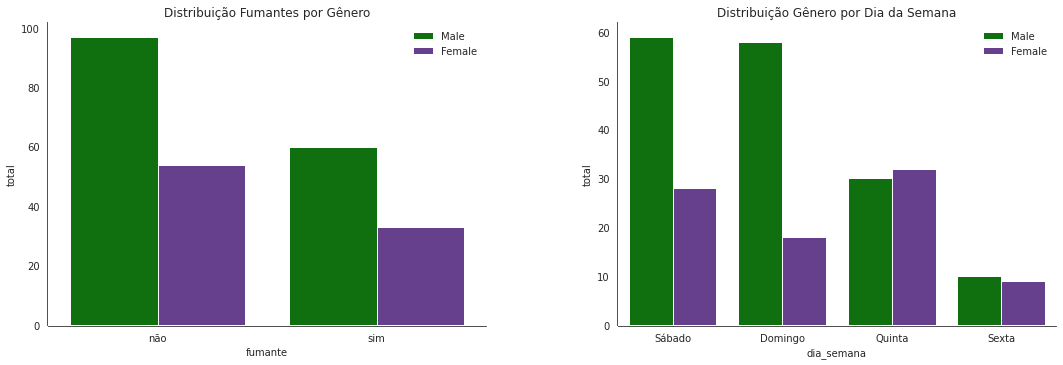

In [ ]:
#conhecendo nossos clientes part2
colors = ["green", "rebeccapurple"]
fig,axs = plt.subplots(1,2, figsize=(10,5))
sns.countplot(data=df_tips, x='fumante', ax=axs[0], order=['No','Yes'], hue='genero',palette=sns.set_palette(sns.color_palette(colors)))
axs[0].set_title('Distribuição Fumantes por Gênero')
axs[0].set_ylabel('total')
axs[0].set_xticklabels(labels=['não','sim'])
axs[0].legend(frameon=False)
sns.countplot(data=df_tips, x='dia_semana', ax=axs[1], 
              order=['Sat','Sun','Thur', 'Fri'], hue='genero',palette=sns.set_palette(sns.color_palette(colors)))
axs[1].set_title('Distribuição Gênero por Dia da Semana')
axs[1].set_ylabel('total')
axs[1].set_xticklabels(labels=['Sábado', 'Domingo', 'Quinta', 'Sexta'])
axs[1].legend(frameon=False)
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=1.5, hspace=0.35,
                    wspace=0.3)
sns.despine(offset=True);

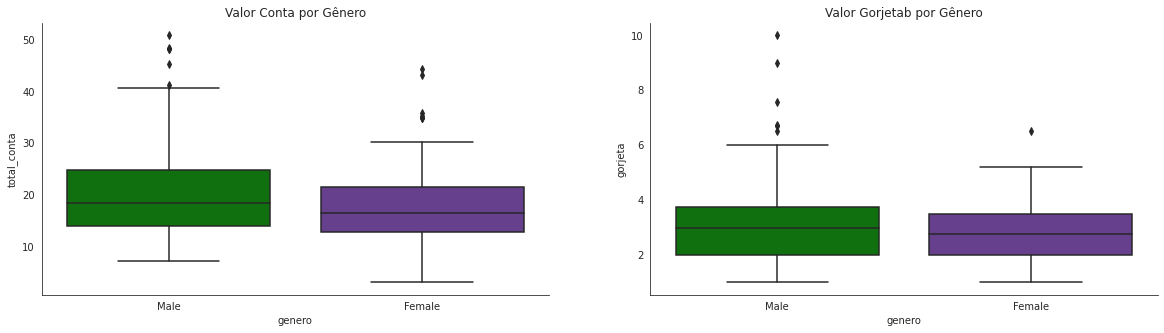

In [ ]:
#entendo categorias
fig,axs = plt.subplots(1,2,figsize=(20,5))
axs[0].set_title('Valor Conta por Gênero')
sns.boxplot(x='genero', y='total_conta', data= df_tips, palette=sns.set_palette(sns.color_palette(colors)), ax=axs[0])
axs[1].set_title('Valor Gorjetab por Gênero')
sns.boxplot(x='genero', y='gorjeta', data= df_tips, palette=sns.set_palette(sns.color_palette(colors)), ax=axs[1])
sns.despine(right=True, top=True );

In [ ]:
df_tips['genero'].value_counts(normalize=True).reset_index().rename(columns={'index': 'genero',
                                                                             'genero':'porcentagem'})

,genero,porcentagem
0,Male,0.643443
1,Female,0.356557


In [ ]:
print("Mediana do valor da conta para homens é de:",
df_tips.loc[df_tips['genero']=='Male', 'total_conta'].median(),
"\nMediana do valor da conta para mulheres é de:",
df_tips.loc[df_tips['genero']=='Female', 'total_conta'].median())

Mediana do valor da conta para homens é de: 18.35 
Mediana do valor da conta para mulheres é de: 16.4


In [ ]:
print("Mediana do valor da gorjeta para homens é de:",
df_tips.loc[df_tips['genero']=='Male', 'gorjeta'].median(),
"\nMediana do valor da conta para mulheres é de:",
df_tips.loc[df_tips['genero']=='Female', 'gorjeta'].median())

Mediana do valor da gorjeta para homens é de: 3.0 
Mediana do valor da conta para mulheres é de: 2.75


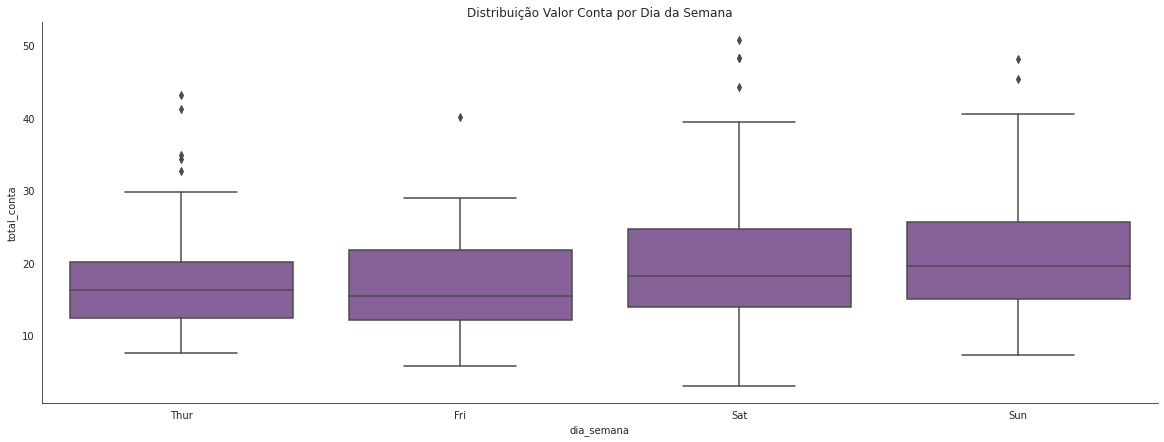

In [ ]:
#entendo faturamento médio por dia da semana
plt.figure(figsize=(20,7))
sns.boxplot(data=df_tips, x='dia_semana', y='total_conta', color="#8958a3")
plt.title('Distribuição Valor Conta por Dia da Semana')
sns.despine(right=True, top=True );

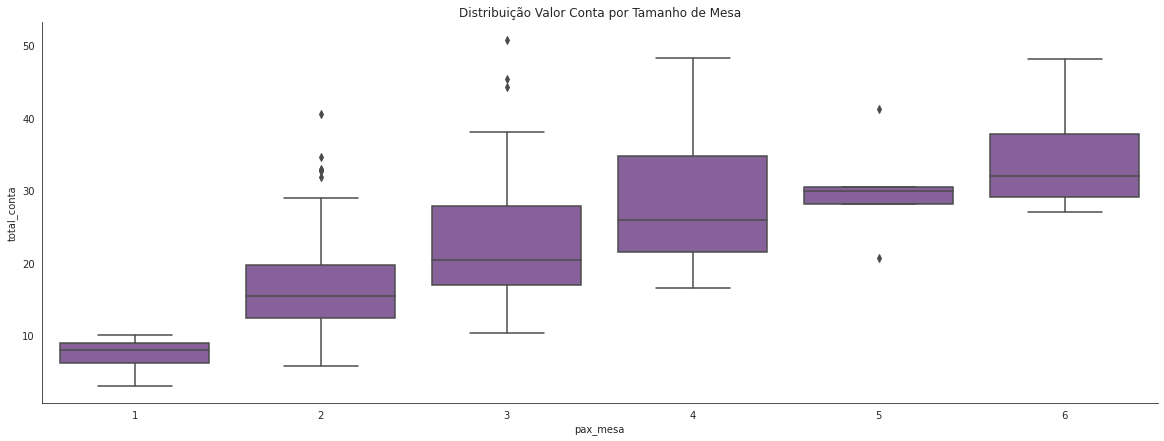

In [ ]:
#por mesa
plt.figure(figsize=(20,7))
sns.boxplot(data=df_tips, x='pax_mesa', y='total_conta', color="#8958a3")
plt.title('Distribuição Valor Conta por Tamanho de Mesa')
sns.despine(right=True, top=True );

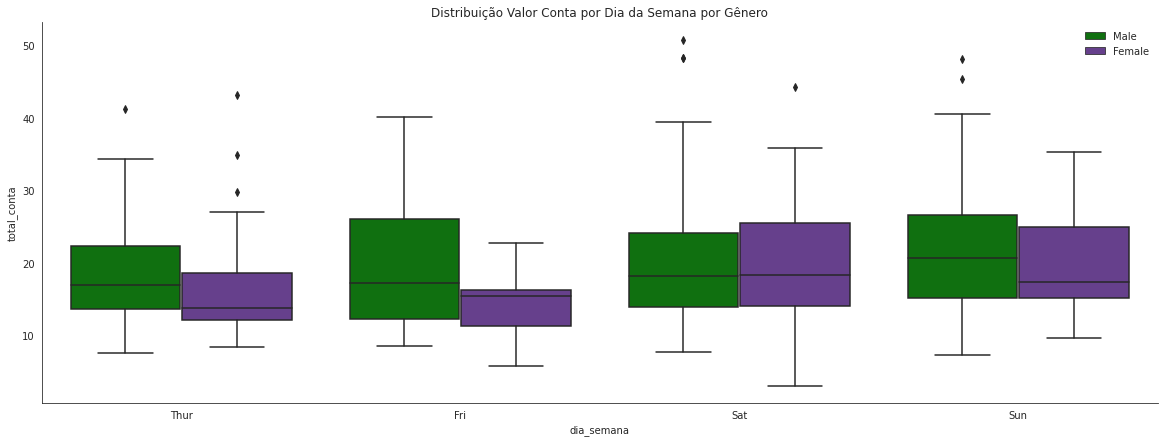

In [ ]:
# por dia da semana e gênero
plt.figure(figsize=(20,7))
sns.boxplot(data=df_tips, x='dia_semana', y='total_conta', hue='genero').legend(
    frameon=False)
plt.title('Distribuição Valor Conta por Dia da Semana por Gênero')
sns.despine(right=True, top=True );

In [ ]:
#checando o percentual de pessoas consumidoras por gênero
df_tips.groupby('dia_semana')['genero'].value_counts(normalize=True)

dia_semana  genero
Thur        Female    0.516129
            Male      0.483871
Fri         Male      0.526316
            Female    0.473684
Sat         Male      0.678161
            Female    0.321839
Sun         Male      0.763158
            Female    0.236842
Name: genero, dtype: float64

In [ ]:
#checando o total de pessoas consumidoras por gênero
df_tips.groupby('dia_semana')['genero'].value_counts()

dia_semana  genero
Thur        Female    32
            Male      30
Fri         Male      10
            Female     9
Sat         Male      59
            Female    28
Sun         Male      58
            Female    18
Name: genero, dtype: int64

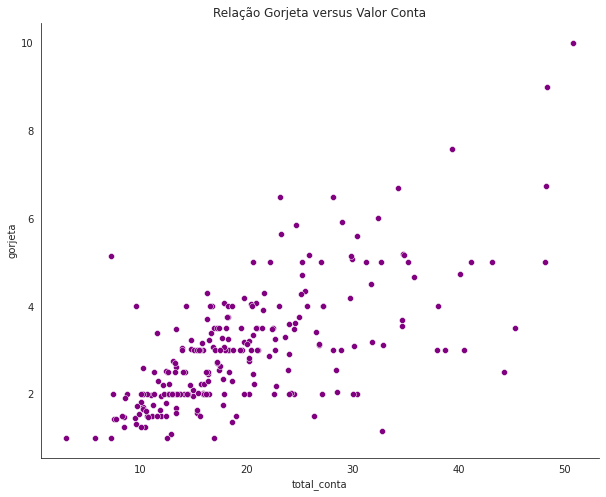

In [ ]:
#existem correlações?
plt.figure(figsize=(10,8))
plt.title("Relação Gorjeta versus Valor Conta")
sns.scatterplot(data= df_tips, x="total_conta", y="gorjeta", color="purple")
sns.despine(right=True, top=True );

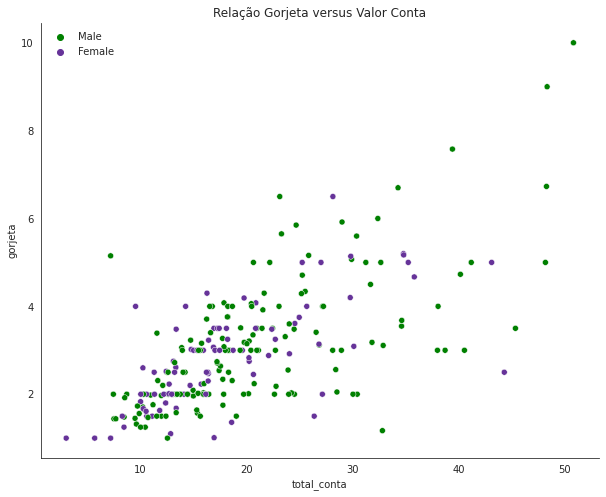

In [ ]:
#existem correlações?
colors = ["green", "rebeccapurple"]
plt.figure(figsize=(10,8))
plt.title("Relação Gorjeta versus Valor Conta")
sns.scatterplot(data= df_tips, x="total_conta", y="gorjeta",hue='genero',  
                palette=sns.set_palette(sns.color_palette(colors))
                ).legend(frameon=False)
sns.despine(right=True, top=True );